In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sns.set(style='darkgrid', palette='deep')

# Считывание данных

In [30]:
df_train = pd.read_csv('/content/drive/MyDrive/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/test.csv')

client_id = df_test.client_id

In [4]:
df_train.head()

,client_id,регион,использование,сумма,частота_пополнения,доход,сегмент_arpu,частота,объем_данных,on_net,продукт_1,продукт_2,зона_1,зона_2,mrg_,секретный_скор,pack,pack_freq,binary_target
0,0,Уран,>24LY,14.617797,1.0,27034.974914,71.37,1.000000,NaN,26.0,10.0,NaN,NaN,NaN,False,0.540984,_output-_сеть 500 (условие) 2000f;5d,1.000000,0
1,1,Марс,>24LY,32.686083,3.0,40373.828300,354.27,2.000000,35.679126,45.0,8.0,NaN,NaN,NaN,False,0.573770,тариф_a 250 (условие) _безлим_c_output_сутки,1.414214,0
2,2,Церера,>24LY,25.318570,3.0,32004.378374,139.74,1.414214,NaN,NaN,13.0,NaN,NaN,NaN,False,0.131148,NaN,NaN,0
3,3,Марс,>24LY,70.710678,38.0,59953.505011,1722.65,6.403124,163.309522,203.0,274.0,NaN,NaN,0.031817,False,0.885246,"трафик: 100 (условие) 40mb,_сутки",4.000000,0
4,4,Меркурий,>24LY,9.244999,2.0,21499.998428,28.63,1.414214,5.000000,NaN,NaN,NaN,NaN,NaN,False,0.344262,"трафик: 100 (условие) 40mb,_сутки",1.000000,0


**Данные по оттоку клиентов**

* client_id - уникальный id клиента
* регион - локация клиента
* использование - использование мобильной связи
* сумма - сумма пополнения баланса
* частота_пополнения - сколько раз клиент пополнял аккаунт
* доход - доход с одного клиента в месяц
* сегмент_arpu - выручка за квартал
* частота - сколько раз клиент приносил прибыль
* объем_данных - число раз, когда клиент делал подключение
* on_net - число звонков внутри сети
* продукт_1 - тариф 1
* продукт_2 - тариф 2
* зона_1 - звонки из гео-области 1
* зона_2 - звонки из гео-области 2
* mrg_ - флаг
* секретный_скор - некоторый модельный скор клиента
* pack - самый активный пакет клиента
* pack_freq - частота активации пакета pack
* binary_target - флаг оттока клиента (только в train)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010248 entries, 0 to 1010247
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   client_id           1010248 non-null  int64  
 1   регион              612396 non-null   object 
 2   использование       1010248 non-null  object 
 3   сумма               655354 non-null   float64
 4   частота_пополнения  655354 non-null   float64
 5   доход               669787 non-null   float64
 6   сегмент_arpu        669787 non-null   float64
 7   частота             669787 non-null   float64
 8   объем_данных        512886 non-null   float64
 9   on_net              641315 non-null   float64
 10  продукт_1           590287 non-null   float64
 11  продукт_2           405005 non-null   float64
 12  зона_1              79807 non-null    float64
 13  зона_2              64000 non-null    float64
 14  mrg_                1010248 non-null  bool   
 15  секретный_скор 

In [ ]:
df_train.nunique()

client_id             1010248
регион                     14
использование               8
сумма                    4168
частота_пополнения        119
доход                   31194
сегмент_arpu            13865
частота                    91
объем_данных            31619
on_net                   8001
продукт_1                2630
продукт_2                1046
зона_1                    465
зона_2                    352
mrg_                        1
секретный_скор             62
pack                      122
pack_freq                 202
binary_target               2
dtype: int64

In [ ]:
df_test.head()

,client_id,регион,использование,сумма,частота_пополнения,доход,сегмент_arpu,частота,объем_данных,on_net,продукт_1,продукт_2,зона_1,зона_2,mrg_,секретный_скор,pack,pack_freq
0,1010248,Нептун,>24LY,9.244999,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.081967,NaN,NaN
1,1010249,Земля,>24LY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.262295,NaN,NaN
2,1010250,Марс,>24LY,18.489997,3.0,30424.692691,114.10,1.732051,1.000000,22.0,13.0,NaN,0.000835,NaN,False,0.934426,_output-_сеть 500 (условие) 2000f;5d,1.000000
3,1010251,NaN,>24LY,39.223207,7.0,44284.990356,512.82,2.645751,7.615773,130.0,123.0,5.0,NaN,NaN,False,0.508197,_output-_сеть 500 (условие) 2000f;5d,2.236068
4,1010252,Сатурн,>24LY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.163934,NaN,NaN


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497586 entries, 0 to 497585
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   client_id           497586 non-null  int64  
 1   регион              301347 non-null  object 
 2   использование       497586 non-null  object 
 3   сумма               322966 non-null  float64
 4   частота_пополнения  322966 non-null  float64
 5   доход               329926 non-null  float64
 6   сегмент_arpu        329926 non-null  float64
 7   частота             329926 non-null  float64
 8   объем_данных        253142 non-null  float64
 9   on_net              315877 non-null  float64
 10  продукт_1           290984 non-null  float64
 11  продукт_2           199779 non-null  float64
 12  зона_1              39179 non-null   float64
 13  зона_2              31505 non-null   float64
 14  mrg_                497586 non-null  bool   
 15  секретный_скор      497586 non-nul

In [ ]:
df_test.nunique()

client_id             497586
регион                    14
использование              8
сумма                   2790
частота_пополнения       112
доход                  25552
сегмент_arpu           11669
частота                   91
объем_данных           24042
on_net                  6456
продукт_1               2178
продукт_2                862
зона_1                   351
зона_2                   284
mrg_                       1
секретный_скор            62
pack                     114
pack_freq                178
dtype: int64

client_id везде уникальные, проблем с логикой не возникнет

интересно, что колонка mrg (с типо bool) и в train и test имеет значение False; следовательно, она не является информативной, и тогда ее можно отбросить

Категориальные фичи:
 - регион;
 - использование;
 - pack;

In [31]:
df_train.drop(columns=['client_id', 'mrg_'], inplace=True)
df_test.drop(columns=['client_id', 'mrg_'], inplace=True)

In [32]:
df_train['type'] = 'train'
df_test['type'] = 'test'

df_tot = pd.concat([df_train.drop(columns=['binary_target']), df_test], ignore_index=True)
df_tot

,регион,использование,сумма,частота_пополнения,доход,сегмент_arpu,частота,объем_данных,on_net,продукт_1,продукт_2,зона_1,зона_2,секретный_скор,pack,pack_freq,type
0,Уран,>24LY,14.617797,1.0,27034.974914,71.37,1.000000,NaN,26.0,10.0,NaN,NaN,NaN,0.540984,_output-_сеть 500 (условие) 2000f;5d,1.000000,train
1,Марс,>24LY,32.686083,3.0,40373.828300,354.27,2.000000,35.679126,45.0,8.0,NaN,NaN,NaN,0.573770,тариф_a 250 (условие) _безлим_c_output_сутки,1.414214,train
2,Церера,>24LY,25.318570,3.0,32004.378374,139.74,1.414214,NaN,NaN,13.0,NaN,NaN,NaN,0.131148,NaN,NaN,train
3,Марс,>24LY,70.710678,38.0,59953.505011,1722.65,6.403124,163.309522,203.0,274.0,NaN,NaN,0.031817,0.885246,"трафик: 100 (условие) 40mb,_сутки",4.000000,train
4,Меркурий,>24LY,9.244999,2.0,21499.998428,28.63,1.414214,5.000000,NaN,NaN,NaN,NaN,NaN,0.344262,"трафик: 100 (условие) 40mb,_сутки",1.000000,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507829,Марс,>24LY,54.694150,14.0,52294.430677,997.01,3.741657,NaN,147.0,207.0,36.0,NaN,NaN,1.000000,тариф_a:500 (условие) 2500f input__ _сеть _250...,3.741657,test
1507830,Марс,>24LY,9.244999,1.0,14723.954424,6.41,1.414214,NaN,266.0,24.0,NaN,NaN,NaN,0.721311,NaN,NaN,test
1507831,NaN,>24LY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016393,NaN,NaN,test
1507832,Марс,>24LY,28.867456,5.0,37991.746291,277.78,2.236068,0.000000,23.0,30.0,NaN,NaN,NaN,0.459016,_output-_сеть 500f =2000f__output_сеть__безлим,1.414214,test


In [ ]:
df_tot.nunique()

регион                   14
использование             8
сумма                  5278
частота_пополнения      121
доход                 34705
сегмент_arpu          15185
частота                  91
объем_данных          36505
on_net                 9003
продукт_1              2875
продукт_2              1185
зона_1                  524
зона_2                  414
секретный_скор           62
pack                    130
pack_freq               228
type                      2
dtype: int64

In [7]:
num_col = set(df_tot.columns) - {'регион', 'использование', 'pack', 'type'}

# Анализ признаков

## Анализ числовых признаков

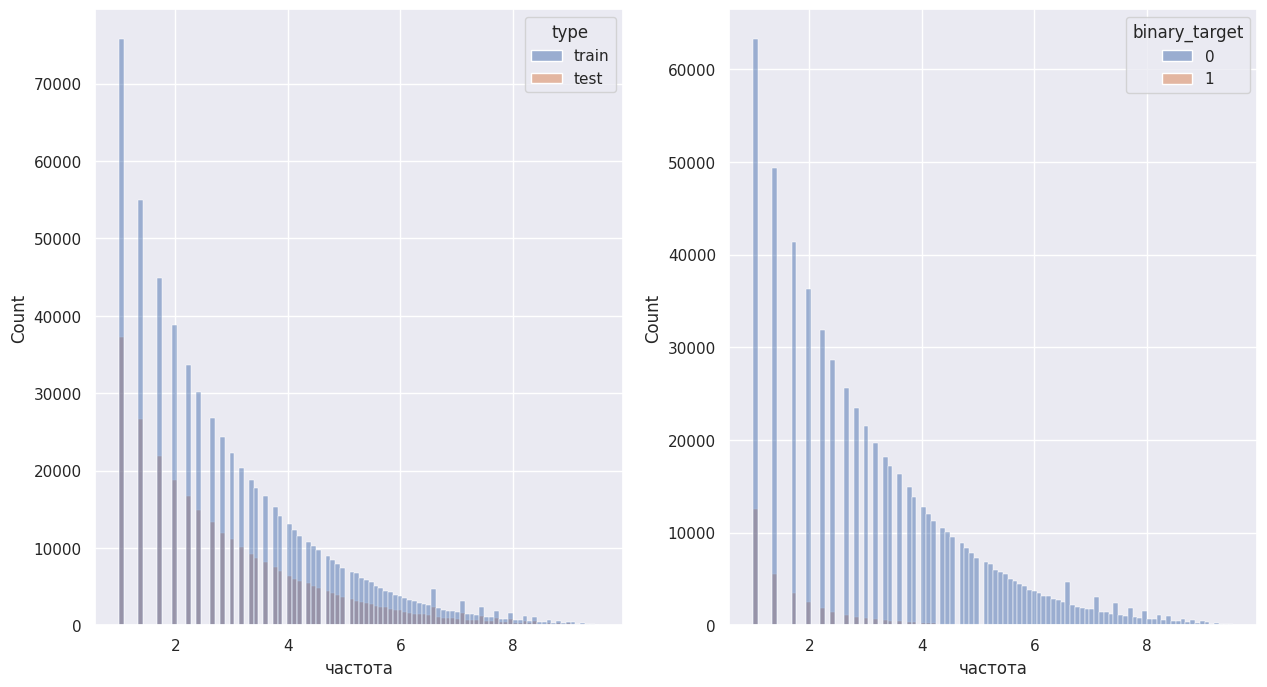

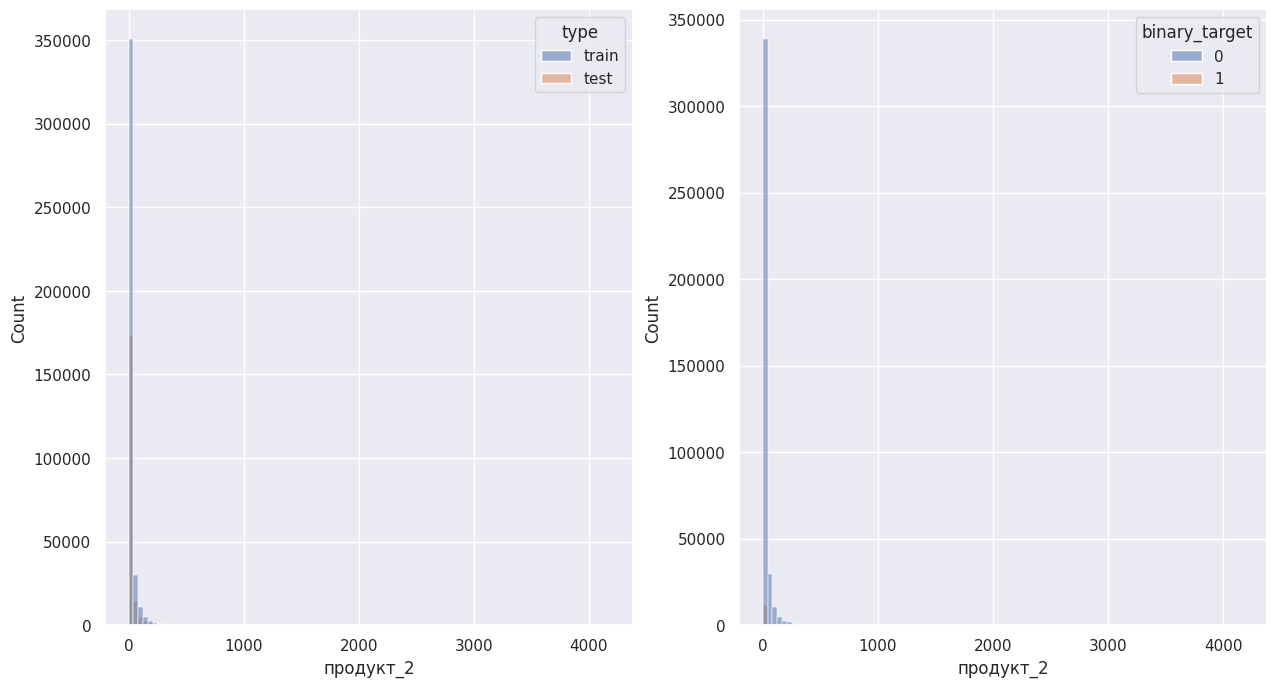

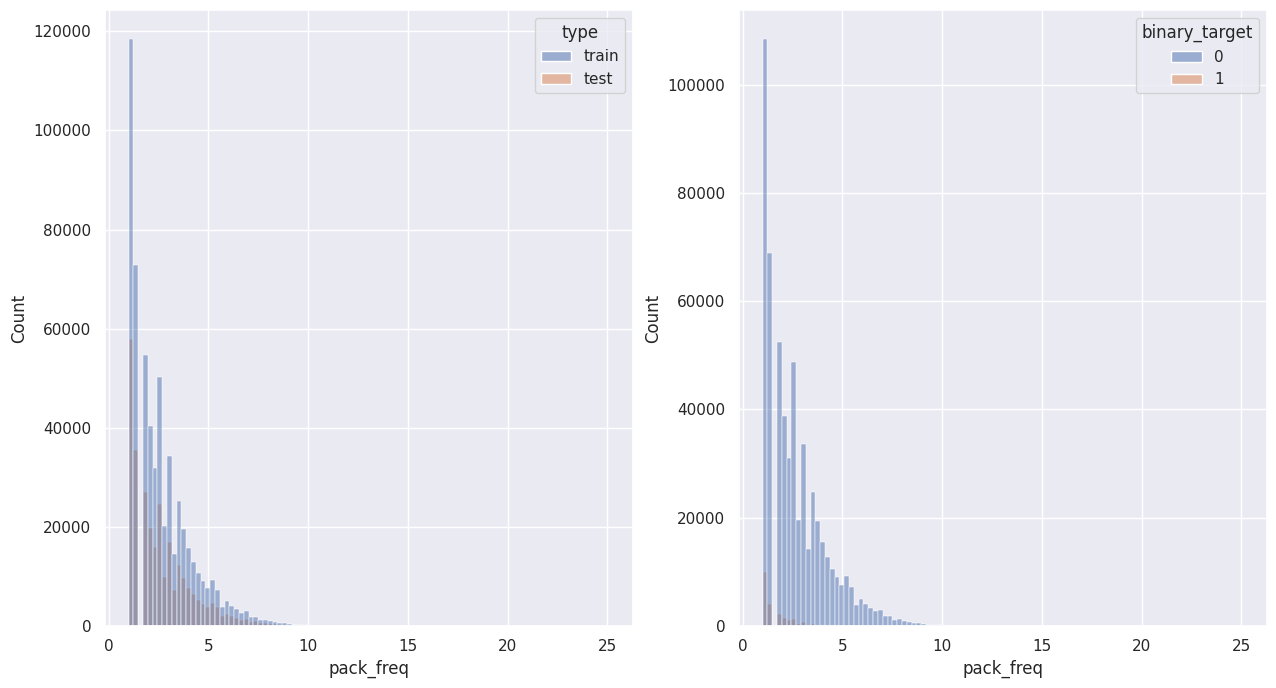

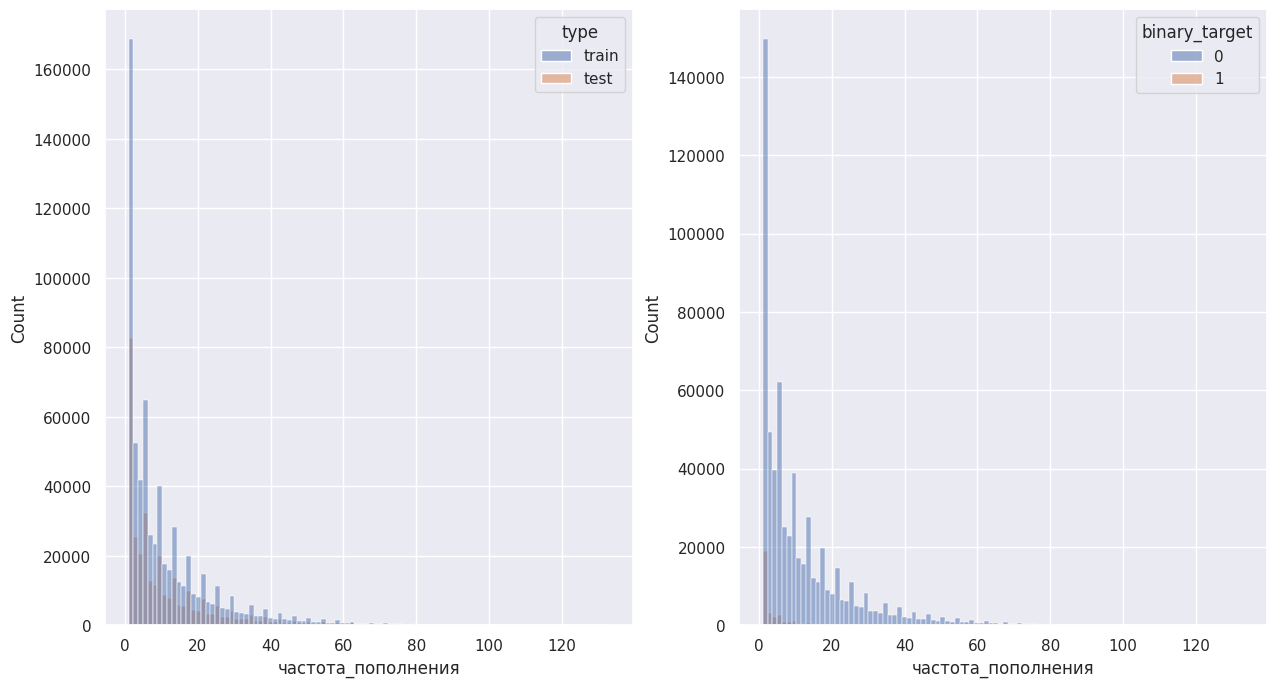

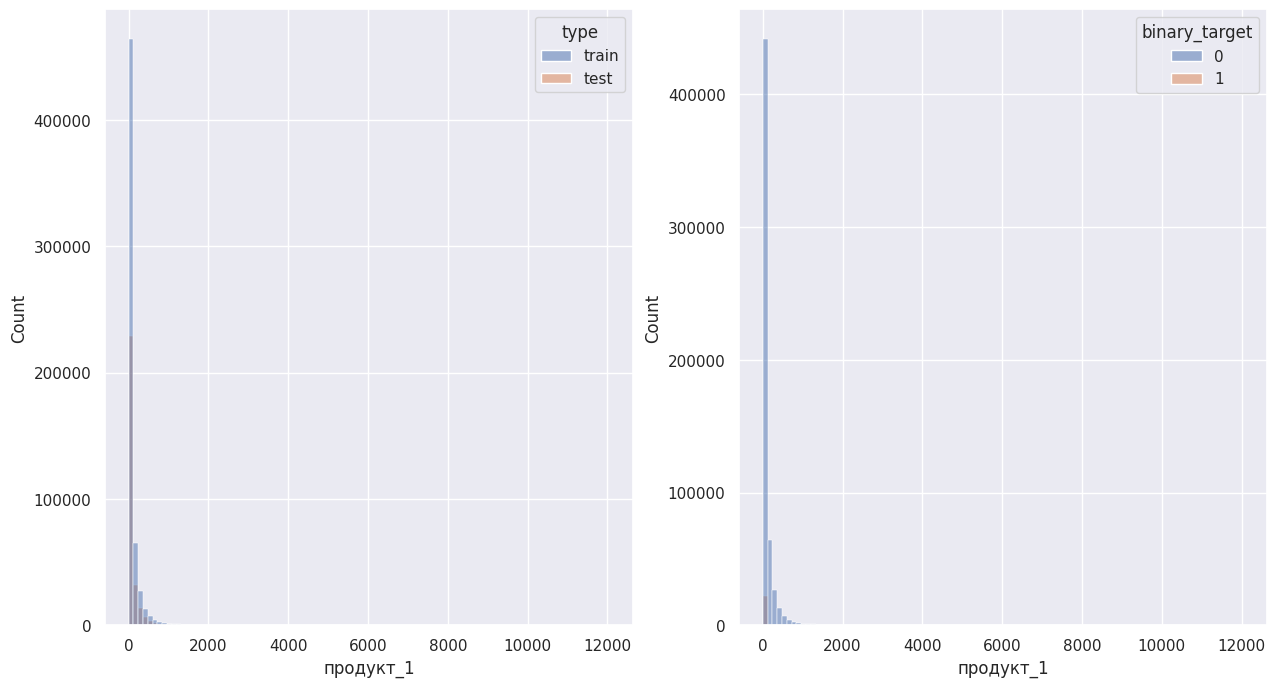

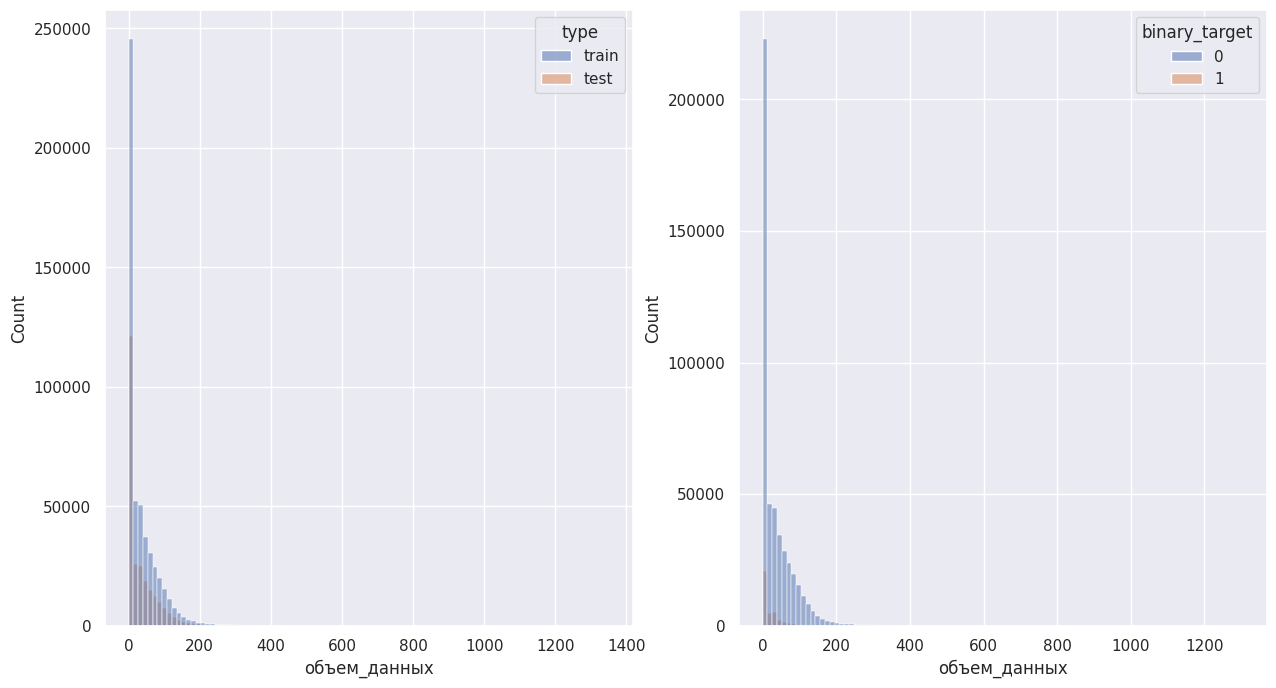

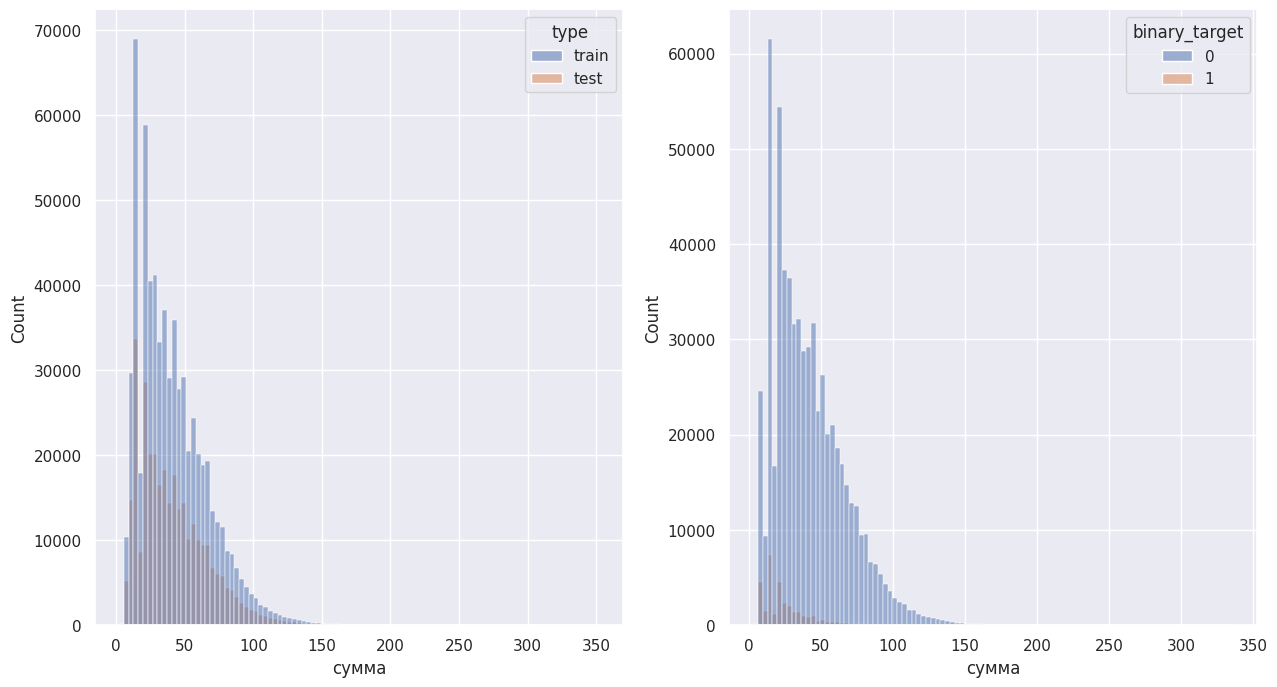

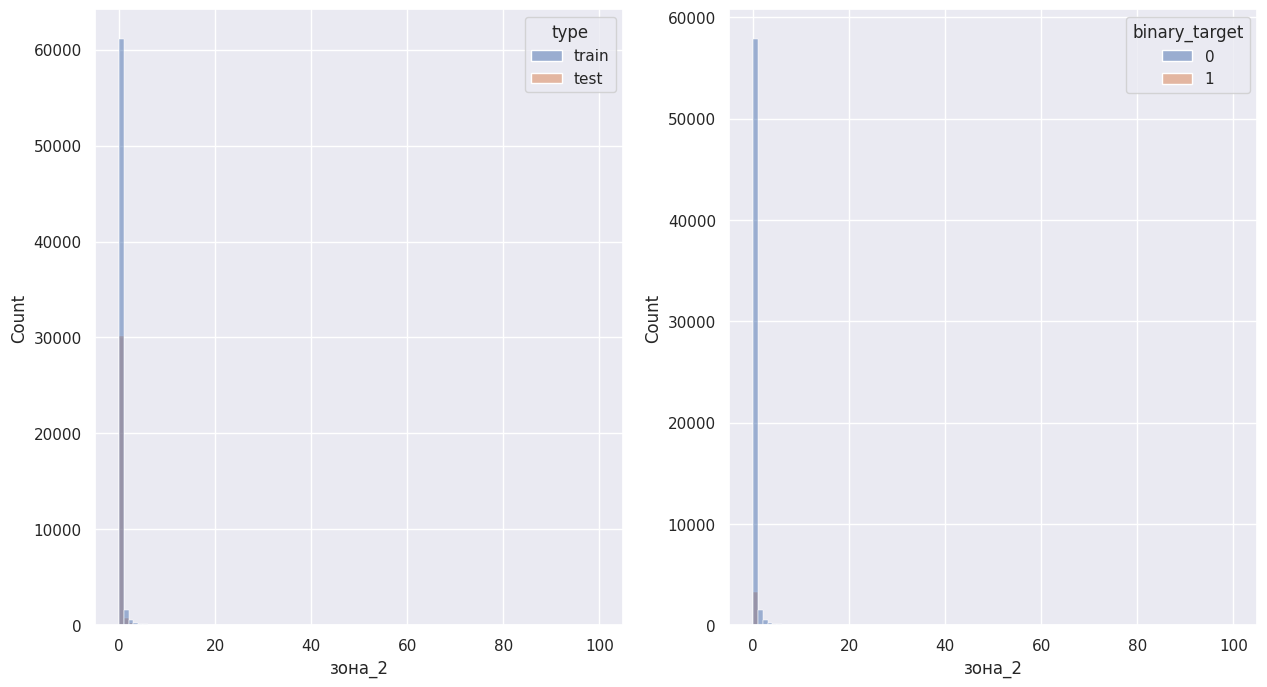

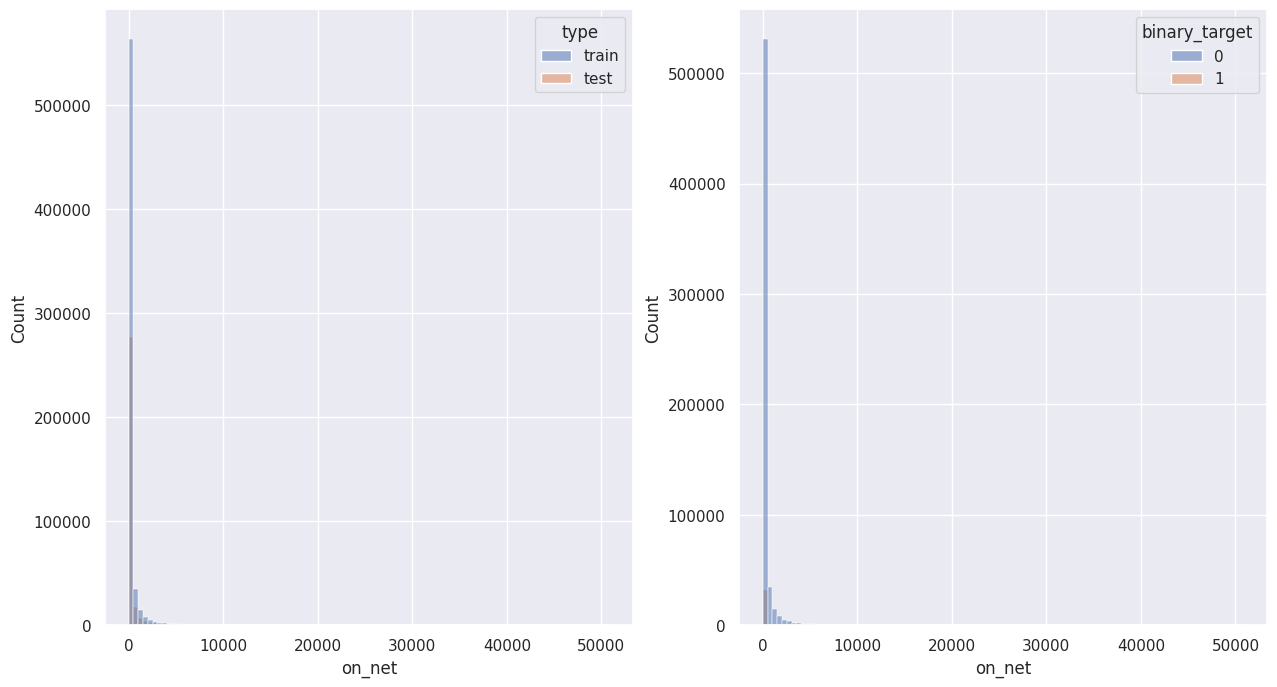

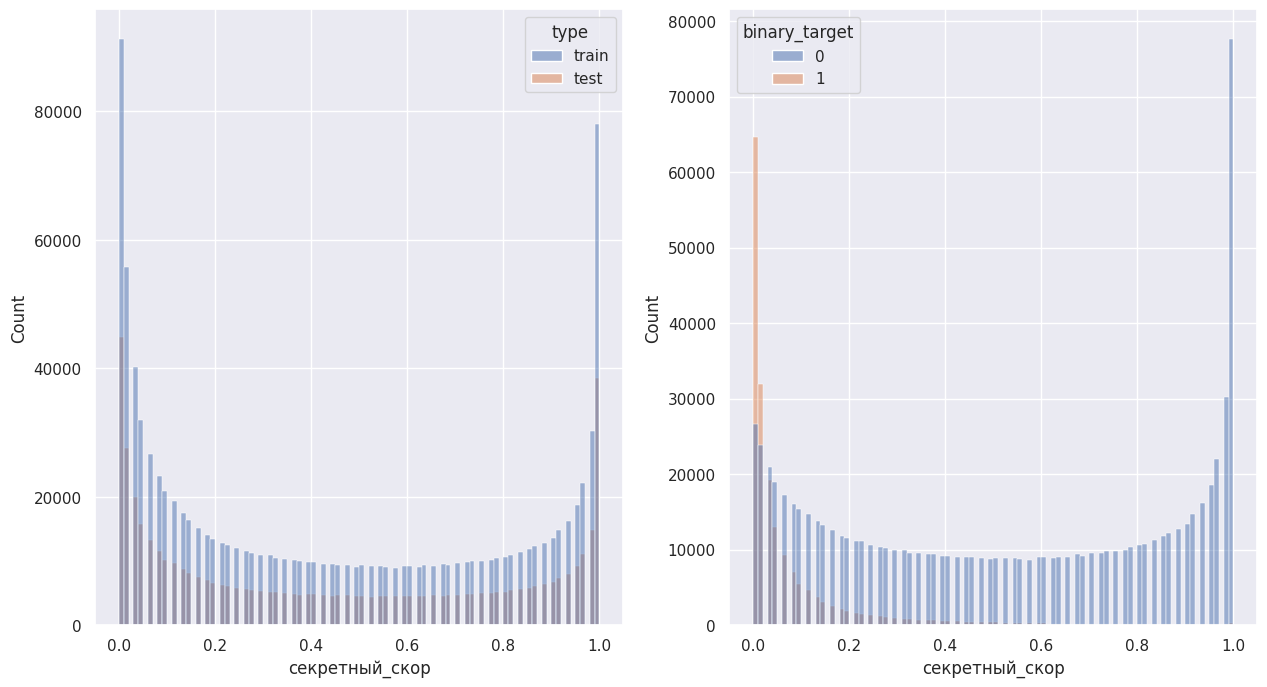

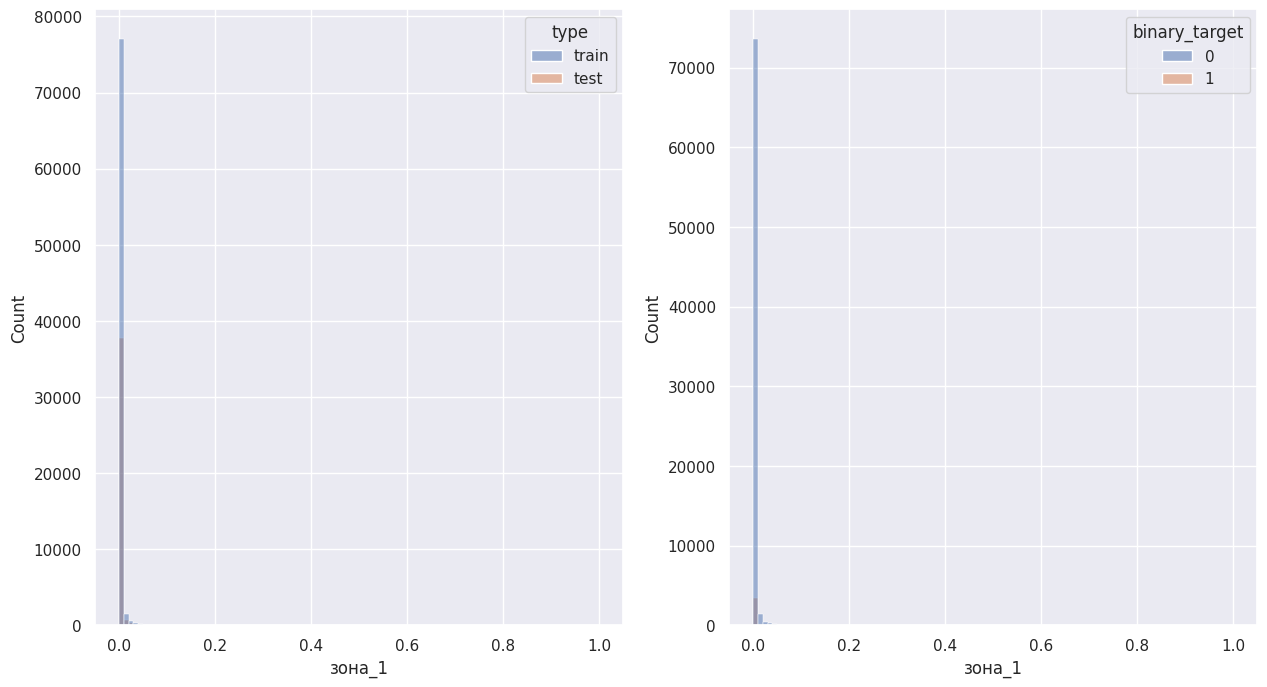

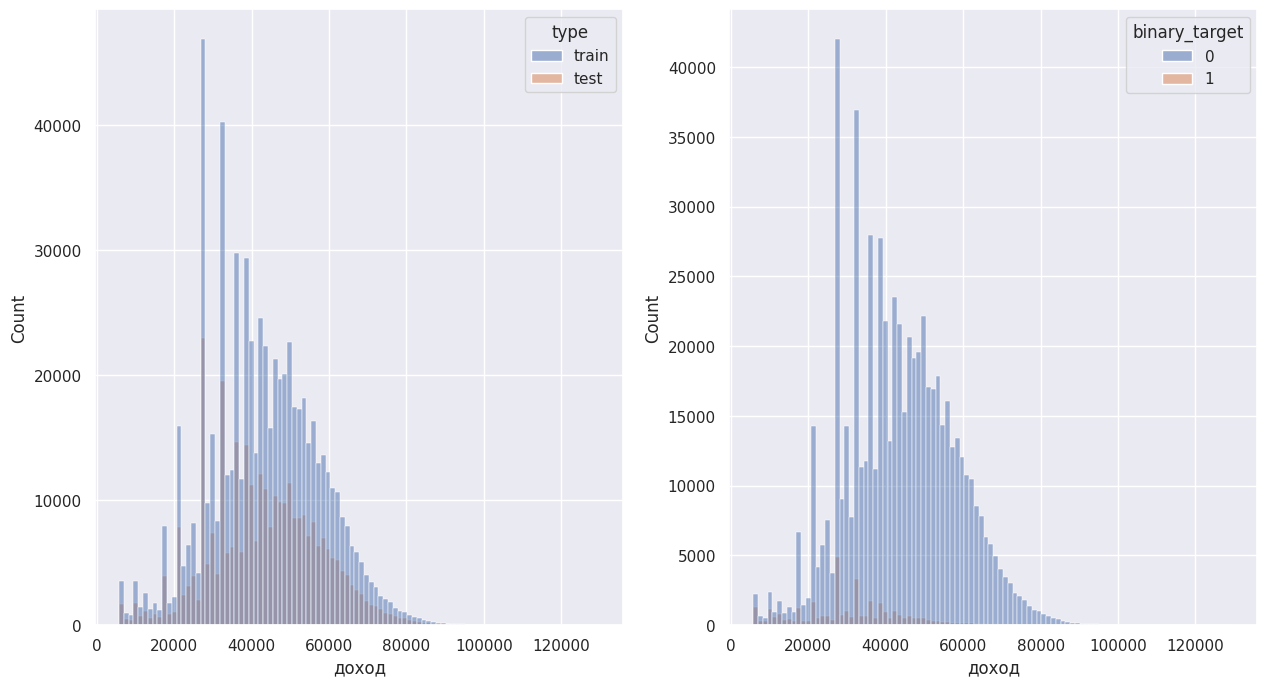

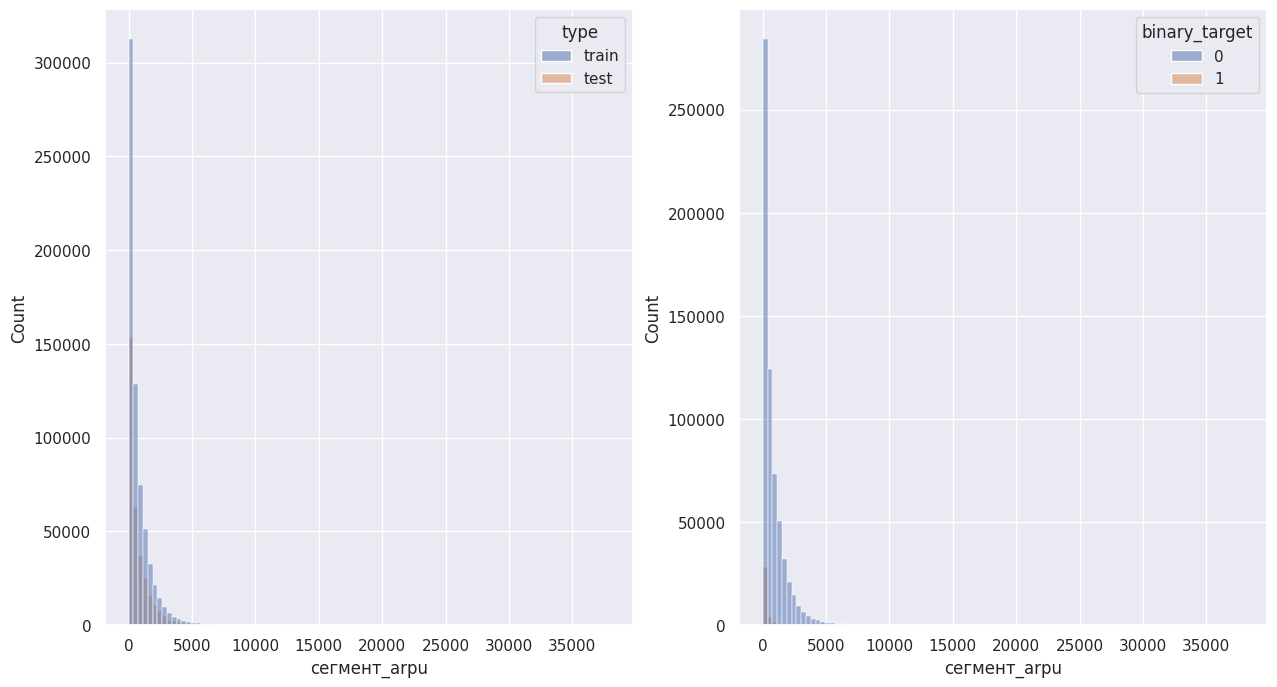

In [33]:
for feature in list(num_col):
  plt.figure(figsize=(15,8))

  plt.subplot(1,2,1)
  sns.histplot(data=df_tot, x=feature, hue='type', bins=100)

  plt.subplot(1,2,2)
  sns.histplot(data=df_train, x=feature, hue='binary_target', bins=100)

  plt.show()

распределение по тесту и трейну признаков совпадает; при этом, таргет 1 везде явно тяготеет к минимальным значениям (то есть можно попробовать склеивать выбросы в большие значения через clip)

In [34]:
df_tot[list(num_col)].describe()

,частота,продукт_2,pack_freq,частота_пополнения,продукт_1,объем_данных,сумма,зона_2,on_net,секретный_скор,зона_1,доход,сегмент_arpu
count,999713.000000,604784.000000,876011.000000,978320.000000,881271.000000,766028.000000,978320.000000,95505.000000,957192.000000,1.507834e+06,118986.000000,999713.000000,999713.000000
mean,3.279998,23.146017,2.601977,11.521423,95.325088,34.308337,41.457739,0.237528,278.000929,4.433466e-01,0.001689,42862.162175,784.027307
std,1.791444,63.506893,1.579124,13.266779,203.328016,46.664851,25.346979,1.022772,874.412483,3.652586e-01,0.008502,14437.177615,1017.723634
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.066398,0.000000,0.000000,0.000000e+00,0.000000,5726.010183,0.000000
25%,1.732051,2.000000,1.414214,2.000000,7.000000,0.000000,20.672445,0.000000,5.000000,8.196721e-02,0.000000,32149.996445,142.310000
50%,3.000000,6.000000,2.236068,7.000000,29.000000,16.000000,35.805726,0.063633,27.000000,3.770492e-01,0.000209,42311.774838,427.350000
75%,4.472136,20.000000,3.464102,16.000000,99.000000,53.656314,56.044893,0.159084,156.000000,8.196721e-01,0.000626,52959.600048,1048.720000
max,9.539392,4174.000000,25.079872,133.000000,12040.000000,1350.505831,352.342589,100.000000,50809.000000,1.000000e+00,1.000000,129843.989985,37898.720000


In [35]:
for feature in list(num_col):
  print(feature)
  print(df_train.loc[df_train[feature].isna(), 'binary_target'].value_counts(normalize=True))

частота
binary_target
0    0.549769
1    0.450231
Name: proportion, dtype: float64
продукт_2
binary_target
0    0.707627
1    0.292373
Name: proportion, dtype: float64
pack_freq
binary_target
0    0.608255
1    0.391745
Name: proportion, dtype: float64
частота_пополнения
binary_target
0    0.558409
1    0.441591
Name: proportion, dtype: float64
продукт_1
binary_target
0    0.605794
1    0.394206
Name: proportion, dtype: float64
объем_данных
binary_target
0    0.694766
1    0.305234
Name: proportion, dtype: float64
сумма
binary_target
0    0.558409
1    0.441591
Name: proportion, dtype: float64
зона_2
binary_target
0    0.80355
1    0.19645
Name: proportion, dtype: float64
on_net
binary_target
0    0.57663
1    0.42337
Name: proportion, dtype: float64
секретный_скор
Series([], Name: proportion, dtype: float64)
зона_1
binary_target
0    0.800439
1    0.199561
Name: proportion, dtype: float64
доход
binary_target
0    0.549769
1    0.450231
Name: proportion, dtype: float64
сегмент_arpu
bin

Попроубем заменить средним пропуски в частоте и доходе, а в остальных - взять медианы

In [36]:
df_test["частота"].fillna(df_test["частота"].mean(), inplace=True)
df_train["частота"].fillna(df_train["частота"].mean(), inplace=True)
df_test["доход"].fillna(df_test["доход"].mean(), inplace=True)
df_train["доход"].fillna(df_train["доход"].mean(), inplace=True)

for feature in list(num_col):
  df_test[feature].fillna(df_test[feature].median(), inplace=True)
  df_train[feature].fillna(df_train[feature].median(), inplace=True)

## Категориальные признаки

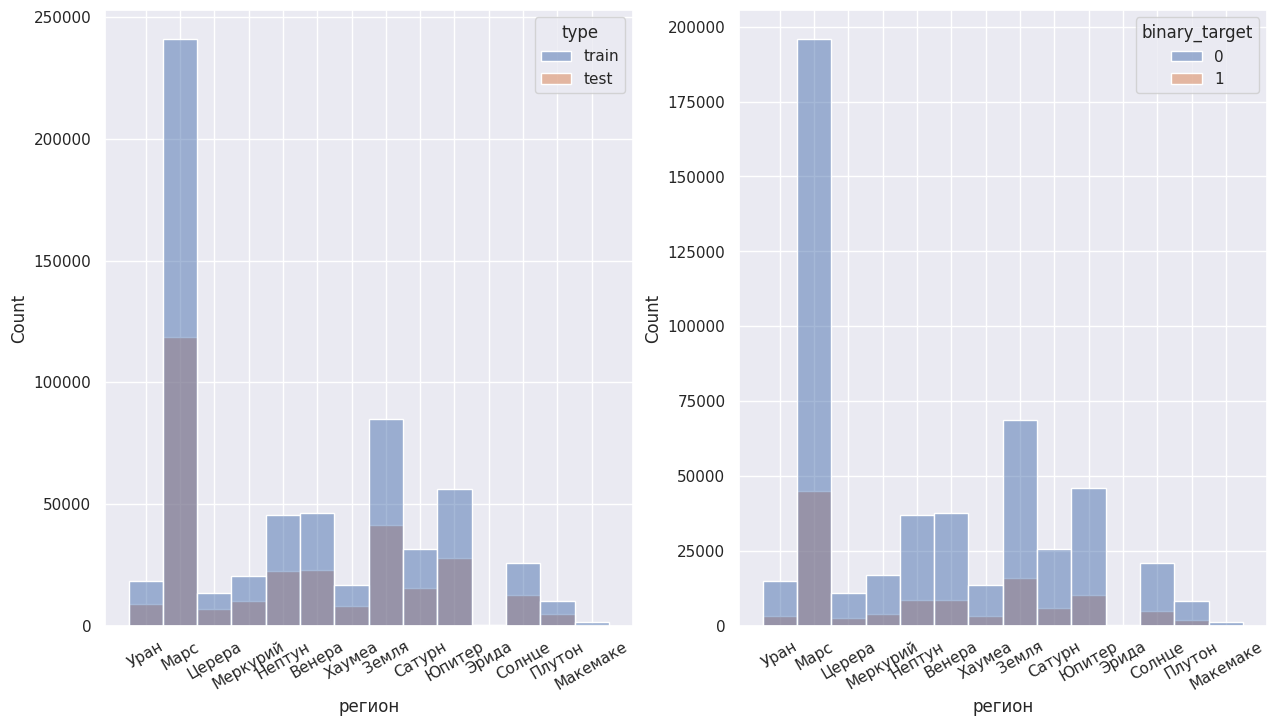

In [37]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.histplot(data=df_tot, x='регион', hue='type')
plt.xticks(rotation=30)

plt.subplot(1,2,2)
sns.histplot(data=df_train, x='регион', hue='binary_target')
plt.xticks(rotation=30)

plt.show()

In [38]:
df_train['регион'].fillna('unknown', inplace=True)
df_test['регион'].fillna('unknown', inplace=True)

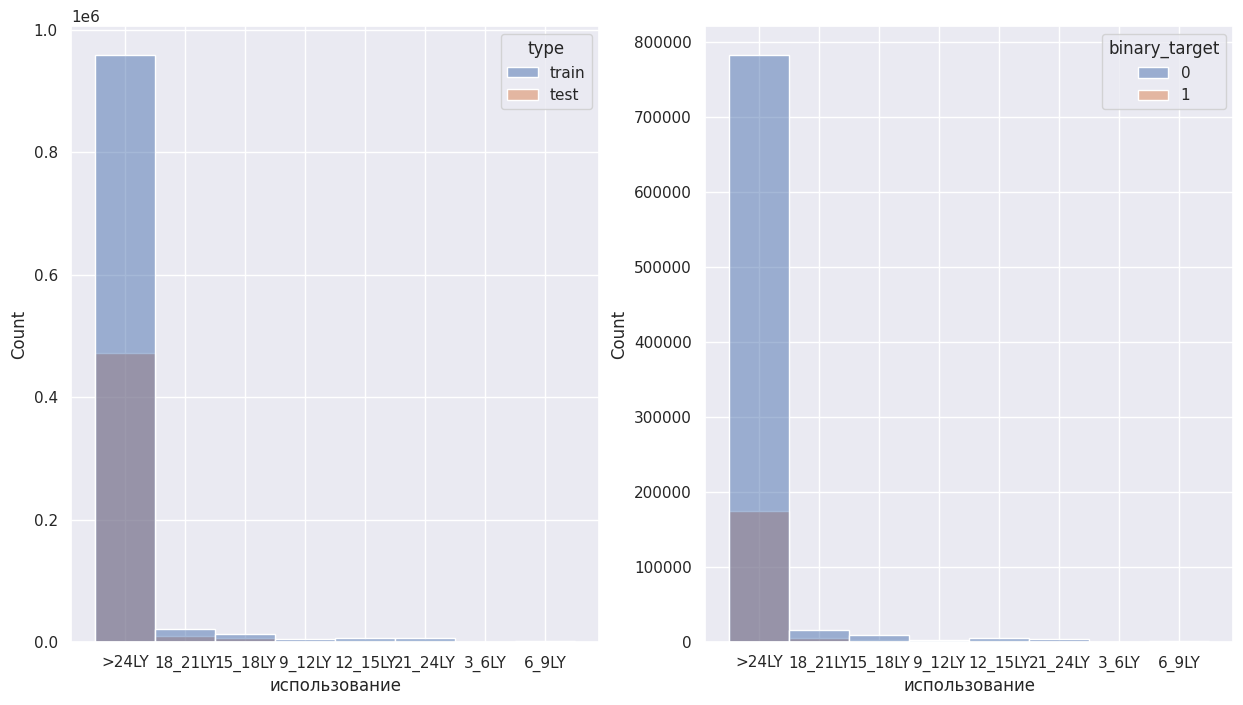

In [39]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.histplot(data=df_tot, x='использование', hue='type')

plt.subplot(1,2,2)
sns.histplot(data=df_train, x='использование', hue='binary_target')

plt.show()

Точно надо объединить в две группы

In [40]:
df_train.loc[df_train['использование'] != '>24LY', 'использование'] = 'other'
df_test.loc[df_test['использование'] != '>24LY', 'использование'] = 'other'

In [41]:
!pip install category_encoders

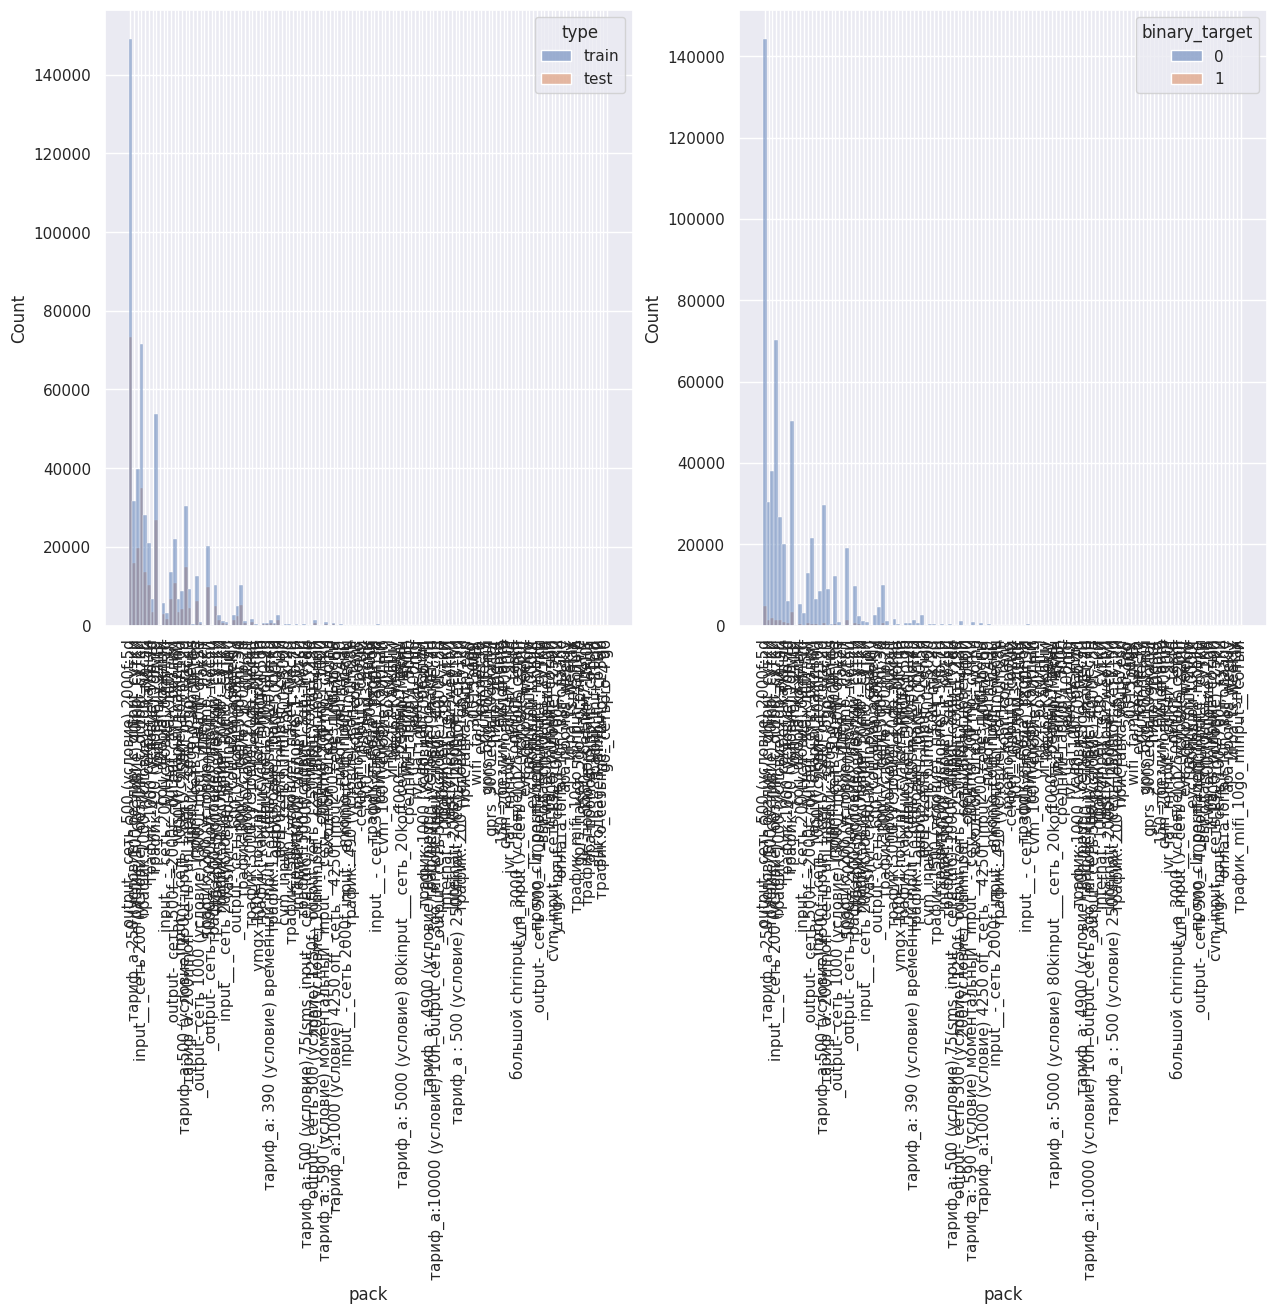

In [42]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.histplot(data=df_tot, x='pack', hue='type', bins=100)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.histplot(data=df_train, x='pack', hue='binary_target', bins=100)
plt.xticks(rotation=90)

plt.show()

Этот признак закодируем TargetEncoder

In [43]:
from category_encoders import TargetEncoder

In [44]:
Targetenc = TargetEncoder().fit(X = df_train.pack, y = df_train.binary_target)

df_train['pack'] = Targetenc.transform(X = df_train.pack)
df_test['pack'] = Targetenc.transform(X = df_test.pack)

In [45]:
df_test.isna().sum() # Контроль что все пропуски заполнили

регион                0
использование         0
сумма                 0
частота_пополнения    0
доход                 0
сегмент_arpu          0
частота               0
объем_данных          0
on_net                0
продукт_1             0
продукт_2             0
зона_1                0
зона_2                0
секретный_скор        0
pack                  0
pack_freq             0
type                  0
dtype: int64

# Обучение моделей

## Бустинг (предпоследний сабмит)

In [21]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 11.2 MB/s eta 0:00:00


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import optuna
from lightgbm import LGBMClassifier, record_evaluation, plot_importance

Исходя из всех предыдущих попыток, было принято решение оставить лишь 4 наиболее информативных колонки, а остальные удалить

In [46]:
cols_to_drop = ['регион', 'зона_1', 'зона_2', 'частота_пополнения', 'доход', 'продукт_1',
                'продукт_2', 'частота', 'pack_freq', 'объем_данных', 'сегмент_arpu','использование', 'type']

In [47]:
df_train.drop(columns=cols_to_drop, inplace=True)
df_test.drop(columns=cols_to_drop, inplace=True)

In [52]:
df_test

,сумма,on_net,секретный_скор,pack
0,9.244999,27.0,0.081967,0.391745
1,35.805726,27.0,0.262295,0.391745
2,18.489997,22.0,0.934426,0.032245
3,39.223207,130.0,0.508197,0.032245
4,35.805726,27.0,0.163934,0.391745
...,...,...,...,...
497581,54.694150,147.0,1.000000,0.022556
497582,9.244999,266.0,0.721311,0.391745
497583,35.805726,27.0,0.016393,0.391745
497584,28.867456,23.0,0.459016,0.018065


In [53]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(columns=['binary_target']), df_train.binary_target, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1, log=False),
        #'num_leaves': trial.suggest_int('num_leaves', 2, 15),
        'n_estimators': trial.suggest_int('n_estimators', 1, 20),
        'max_depth': trial.suggest_int('max_depth', 1, 8),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 50, log=False),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 50, log=False),
        'random_state': 42
    }

    clf = LGBMClassifier(**params, verbosity=-1)
    clf.fit(
        X=X_train,
        y=y_train
    )
    preds = clf.predict(X_val)
    f_valid = f1_score(
        y_true=y_val,
        y_pred=preds
    )

    return f_valid

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

Наилучший результат на валидации показал следующий странный набор гиперпараметров

In [54]:
best_params = {'learning_rate': 0.9759401364080774, 'n_estimators': 1, 'max_depth': 4, 'reg_alpha': 3.643464341091844, 'reg_lambda': 15.616003689443925}

Получилось, что вместо бустинга будем обучать 1 решающее дерево глубины 4

In [55]:
clf_boost = LGBMClassifier(random_state=42, **best_params, verbosity=-1)
clf_boost.fit(
    X=X_train,
    y=y_train
)

preds_test = clf_boost.predict(X_test)
f1_test = f1_score(
    y_true=y_test,
    y_pred=preds_test
)

print(f1_test)

0.6476923076923076


In [ ]:
# Формирование сабмита
predicts = clf_boost.predict(df_test)
subm = pd.DataFrame({'client_id': client_id, 'preds': predicts})
subm.to_csv('submision6.csv',index=False)

## Forest (последний сабмит)


В силу странного результата на бустинге, попробуем обучить случайный лес на том же наборе признаков

In [ ]:
def objective_forest(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1, log=False),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 5),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.01, 1, log=False),
        'n_estimators': trial.suggest_int('n_estimators', 1, 40),
        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 50, log=False),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 50, log=False),
        'n_jobs': -1,
        'random_state': 42
    }

    clf = LGBMClassifier(boosting_type='rf', **params, verbosity=-1)
    clf.fit(
        X=X_train,
        y=y_train
    )
    preds = clf.predict(X_val)
    f_valid = f1_score(
        y_true=y_val,
        y_pred=preds
    )

    return f_valid

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_forest, n_trials=100)

На валидации удалось подобрать следующий наилучший набор гиперпараметров

In [57]:
best_params = {'learning_rate': 0.08526277097363283, 'bagging_freq': 3, 'feature_fraction': 0.3925341795256062, 'n_estimators': 17, 'max_depth': 3, 'reg_alpha': 37.925991076475036, 'reg_lambda': 15.76741914474374}

In [59]:
clf_rf = LGBMClassifier(boosting_type='rf', random_state=42,**best_params, verbosity=-1)
clf_rf.fit(
    X=X_train,
    y=y_train
)

preds_test = clf_rf.predict(X_test)
f1_test = f1_score(
    y_true=y_test,
    y_pred=preds_test
)

print(f1_test)

0.6475154905128143


In [ ]:
params_rf = {'learning_rate': 0.08526277097363283, 'bagging_freq': 3, 'feature_fraction': 0.3925341795256062, 'n_estimators': 17, 'max_depth': 3, 'reg_alpha': 37.925991076475036, 'reg_lambda': 15.76741914474374}
clf = LGBMClassifier(boosting_type='rf', random_state=42,**params_rf, verbosity=-1)
clf.fit(
    X=X_train,
    y=y_train
)
preds_test = clf.predict(X_test)
f1_test = f1_score(
    y_true=y_test,
    y_pred=preds_test
)

print(f1_test)

0.6475154905128143


In [ ]:
# Формирование сабмита
predicts = clf.predict(df_test)
subm = pd.DataFrame({'client_id': client_id, 'preds': predicts})
subm.to_csv('submision7.csv',index=False)